In [2]:
import neftpy.upvt_oil as pvt
import neftpy.uconvert as uc

import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const
from sympy import *

# Газосодержание


Газосодержание $R_s$ - содержание растворенного газа в нефти при заданных термобарических условиях (solution gas ratio). Определяется как отношение объема газа выделившегося из нефти при приведении ее к стандартным условиям к объему оставшейся нефти в стандартных условиях 

## Газосодержание, корреляция Стендинга


Для расчета газосодержания используется корреляция, обратная корреляции Стендинга (1.1.1.1) для давления насыщения нефти газом. 

\begin{equation} 
R_s =  \gamma_g  \left( \frac{1.92 p}{\ 10^{y_g}}\right)^{1.204} 
\end{equation}

где:

$R_s$ - газосодержание, $м^3/м^3 $

$P$ - давление, $МПа$ 

$\gamma_g$ - относительная плотность газа, безразмерная величина  

$y_g$ - мольная доля газа, $ y_g = 1.225 +0.00164 T - \dfrac{ 1.769}{\gamma_o}$

$\gamma_o$ - относительная плотность нефти, безразмерная величина  

$ T $ - температура, $ ^{\circ}\mathrm{K}$

Газосодержание является одним из ключевых свойств нефти при расчётах производительности скважин и работы скважинного оборудования. Динамика изменения газосодержания во многом определяет количество свободного газа в потоке и должна учитываться при проведении расчётов.

Если известно газосодержание при давлении насыщения, то газосодержание при давлениях ниже давления насыщения может быть получено из пропорции:

$$ R_s =  \ R_{sb}\left( \frac{P}{\ P_b}\right)^{1.204} $$

где:

$R_s$ - газосодержание, $м^3/м^3 $

$P$ - давление, $МПа$ 

$P_b$ - давление насыщения, $МПа$

$R_{sb}$ - газосодержание при давлении насыщения, $м^3/м^3 $

Корреляции Standing базируются на 105 экспериментально определенных давлениях насыщения нефтяных систем Калифорнии. Диапазоны значений основных свойств, использованных для разработки данной корреляции, приведены в таблице ниже. 

| <p align="left"> Параметр  | Диапазон |
| :--- | :--- |
| <p align="left"> давление насыщения,$P_b$ , $ МПа $  | 0.896…48.263  |
| <p align="left"> температура, $^{\circ}\mathrm{K} $ | 310…400 |
| <p align="left"> газосодержание при давлении насыщения, $R_{sb}$ , $м^3/м^3 $ | 3.6…254 |
| <p align="left"> относительная плотность нефти по воде, $\gamma_o$ | 0.725…0.956  |
| <p align="left"> относительная плотность газа, $\gamma_g$  | 0.59…0.95  |


ref "A Pressure-Volume-Temperature Correlation for Mixtures of California Oil and Gases", M.B. Standing, Drill. & Prod. Prac., API, 1947.

In [3]:
pvt.unf_rs_Standing_m3m3(p_MPaa=3, pb_MPaa=10, rsb_m3m3=130, gamma_oil=0.86, gamma_gas=0.6, t_K=350)

array(30.50684834)

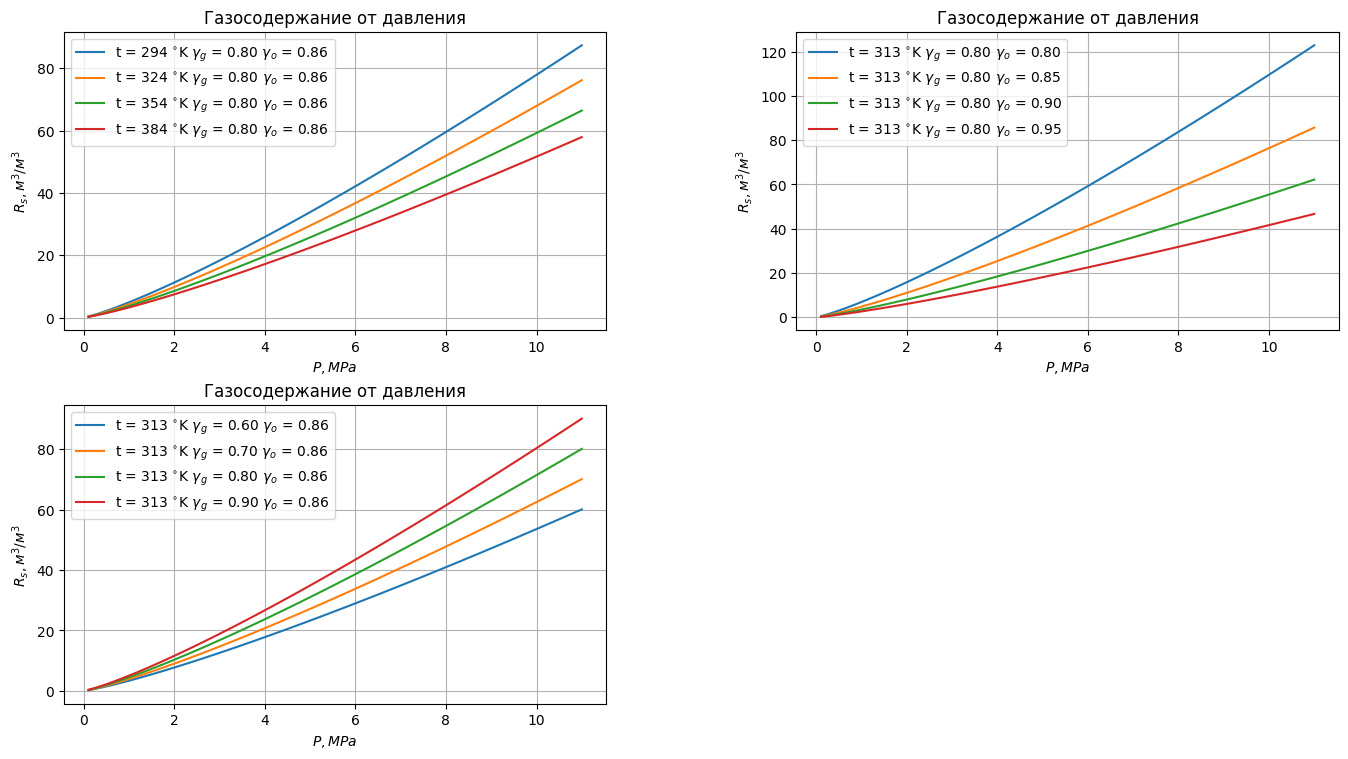

In [4]:
# параметры определяющие диапазоны значений для построения графиков
p_set=np.linspace(0.11,11,100)
t_set=np.arange(294,400,30)
t_set_def=np.array([313])
gg_set=np.arange(0.6,1,0.1)
gg_set_def=np.array([0.8])
go_set=np.arange(0.8,1,0.05)
go_set_def=np.array([0.86])
# функция для автоматизации построения графиков по давлению насыщения
def plot_rs_p(plt, func, 
              tset, goset, ggset,
              plot_title, plot_xlab, plot_ylab):
    for t in tset:
        for gg in ggset:
            for go in goset:
                plt.plot(p_set, func(p_set, t_K = t, gamma_gas = gg, gamma_oil = go), 
                         label=r't = %1.0f $ ^{\circ}\mathrm{K}$'%t +
                               r' $\gamma_g$ = %1.2f'%gg + 
                               r' $\gamma_o$ = %1.2f'%go
                        )
    plt.title(plot_title)
    plt.ylabel(plot_ylab, color = 'black')
    plt.xlabel(plot_xlab, color = 'black')
    plt.legend()

# код для построения графиков
plt.figure(figsize=(15,8))
f = pvt.unf_rs_Standing_m3m3
# рисуем первый график
plt.subplot(221)
plot_rs_p(plt, pvt.unf_rs_Standing_m3m3,
          t_set,go_set_def,gg_set_def,
          'Газосодержание от давления',
          '$P, MPa$',
          '$R_s, м^3/м^3$')
plt.grid()
# рисуем второй график
plt.subplot(222)
plot_rs_p(plt, pvt.unf_rs_Standing_m3m3,
          t_set_def,go_set,gg_set_def,
              'Газосодержание от давления',
               '$P, MPa$',
               '$R_s, м^3/м^3$')
plt.grid()
# рисуем третий график
plt.subplot(223)
plot_rs_p(plt, pvt.unf_rs_Standing_m3m3,
          t_set_def,go_set_def,gg_set,
              'Газосодержание от давления',
               '$P, MPa$',
               '$R_s, м^3/м^3$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
# рисуем все
plt.grid()
plt.show()

## Газосодержание, корреляция Веларде-Маккейна

Корреляция Веларде-Маккейна (1999) для газосодержания базируется на 718 лабораторных исследованиях разгазирования различных нефтей со всего мира.

$$ R_s = R_{sb}R_{sr} $$

где:

$R_s$ - газосодержание, $м^3/м^3$

$R_{sb}$ - газосодержание при давлении насыщения, $м^3/м^3$

$R_{sr}$ - приведенное газосодержание

$$R_{sr}=a_1p_r^{a_2} + (1-a_1)P_r^{a_3}$$

где $P_r$ - степень превышения давления, $psig/psig$

$$P_r=\dfrac{(P-14,7)}{(P_b-14,7)} $$ 

$P$ - давление, psia

$P_b$ - давление насыщения, psia

$$a_1=9.73 \cdot 10^{-7}\gamma_{gSP}^{1.672608}API^{0.929870}T^{0.247235}(P_b-14.7)^{1.056052} $$

$$a_2=0.022339 \gamma_{gSP}^{-1.004750}API^{0.337711}T^{0.132795}(P_b-14.7)^{0.302065}$$

$$a_3=0.725167 \gamma_{gSP}^{-1.485480}API^{-0.164741}T^{-0.091330}(P_b-14.7)^{0.047094}$$

где в свою очередь

$\gamma_{gSP}$ - относительная плотность газа на сепараторе

$API$ - плотность нефти в градусах API 

$T$ - температура, F


В приведенной таблице представлены диапазоны значений использованных для создания корреляции:

| <p align="left"> Параметр  | Мин|Среднее|Макс|
| :--- | :---: |:---:|:---:|
| <p align="left"> давление насыщения,$P_b$ , $ МПа $  | 2.861  |15.706|53.434|
| <p align="left"> температура, $^{\circ}\mathrm{С} $ | 21 |86|160|
| <p align="left"> относительная плотность газа на сепараторе, $\gamma_g$  | 0.555  |0.793|1.472|
| <p align="left"> объемный коэффициент нефти при давлении насыщения, $B_{ob}$ , $ м^3/м^3 $ | 1.012  |1.358|2.042|

>"Correlation of Black Oil Properties at Pressures Below Bubblepoint Pressure—A New Approach",
    J. VELARDE, T.A. BLASINGAME Texas A&M University, W.D. MCCAIN, JR. S.A. Holditch & Associates, Inc 1999

In [5]:
A = np.array([9.73 * 10 ** (-7), 1.672608, 0.929870, 0.247235, 1.056052])
B = np.array([0.022339, -1.004750, 0.337711, 0.132795, 0.302065])
C = np.array([0.725167, -1.485480, -0.164741, -0.091330, 0.047094])

a1, a2, a3 = symbols('a1 a2 a3')
api = symbols('API')
gamma_gas = symbols('gamma_gas')
gamma_o = symbols('gamma_o')
t_F,t_K = symbols('T_[F] T_[K]')
pb_psia, p_bMPaa = symbols('p_b[psia],p_b[MPaa]')

eq1 = Eq(a1, A[0] * gamma_gas ** A[1] * api ** A[2] * t_F ** A[3] * (pb_psia - 14.7) ** A[4])
eq2 = Eq(a2, B[0] * gamma_gas ** B[1] * api ** B[2] * t_F ** B[3] * (pb_psia - 14.7) ** B[4])
eq3 = Eq(a3, C[0] * gamma_gas ** C[1] * api ** C[2] * t_F ** C[3] * (pb_psia - 14.7) ** C[4])

display(eq1)
display(eq2)
display(eq3)

# выражения для преобразования единиц измерения из американских промысловых в практические метрические
api_to_gamma_o = 141.5 / gamma_o - 131.5
F_to_K = t_K * 9 / 5 - 459.67
psi_to_MPa = p_bMPaa * 145.037737730209#14.6959 #* 10.1325
# покажем выражения в печатном виде
display(Eq(api, api_to_gamma_o))
display(Eq(t_F, F_to_K))
display(Eq(pb_psia, psi_to_MPa))

eq1_m=simplify(eq1.subs(api, api_to_gamma_o)
                  .subs(t_F, F_to_K)
                  .subs(pb_psia, psi_to_MPa)
              )
display(eq1_m)

eq2_m=simplify(eq2.subs(api, api_to_gamma_o)
                  .subs(t_F, F_to_K)
                  .subs(pb_psia, psi_to_MPa)
              )
display(eq2_m)

eq3_m=simplify(eq3.subs(api, api_to_gamma_o)
                  .subs(t_F, F_to_K)
                  .subs(pb_psia, psi_to_MPa)
              )
display(eq3_m)

Eq(a1, 1.66287899039628e-5*API**0.92987*T_[F]**0.247235*gamma_gas**1.672608*(0.0680272108843537*p_b[psia] - 1)**1.056052)

Eq(a2, 0.0503117517536907*API**0.337711*T_[F]**0.132795*(0.0680272108843537*p_b[psia] - 1)**0.302065/gamma_gas**1.00475)

Eq(a3, 0.823022437221697*(0.0680272108843537*p_b[psia] - 1)**0.047094/(API**0.164741*T_[F]**0.09133*gamma_gas**1.48548))

Eq(API, -131.5 + 141.5/gamma_o)

Eq(T_[F], 9*T_[K]/5 - 459.67)

Eq(p_b[psia], 145.037737730209*p_b[MPaa])

Eq(a1, 0.0849029848623362*gamma_gas**1.672608*(-0.929328621908127 + 1/gamma_o)**0.92987*(0.0039158526769204*T_[K] - 1)**0.247235*(p_b[MPaa] - 0.101352932209575)**1.056052)

Eq(a2, 1.20743882814017*(-0.929328621908127 + 1/gamma_o)**0.337711*(0.0039158526769204*T_[K] - 1)**0.132795*(p_b[MPaa] - 0.101352932209575)**0.302065/gamma_gas**1.00475)

Eq(a3, 0.231607087371213*(p_b[MPaa] - 0.101352932209575)**0.047094/(gamma_gas**1.48548*(-0.929328621908127 + 1/gamma_o)**0.164741*(0.0039158526769204*T_[K] - 1)**0.09133))

In [6]:
# объявления переменных необходимых для преобразования единиц в вырожении
b_o = symbols('b_o')
rho_sto_lbft3, rho_or_lbft3 = symbols('rho_sto[lbft3] rho_or[lbft3]')
rs_scfstb, gamma_g = symbols('r_s[scfstb] gamma_g')
rs_m3m3 = symbols('r_s[m3m3]')
rho_sto_kgm3, rho_or_kgm3 = symbols('rho_sto[kgm3] rho_or[kgm3]')

# определение алгоритма расчета в американских промысловых единицах
eq1 = Eq(b_o, (rho_sto_lbft3 + 0.01357 * rs_scfstb * gamma_g)/rho_or_lbft3)
# покажем выражения в печатном виде
print('исходное выражение')
display(eq1)

# выражения для преобразования единиц измерения из американских промысловых в практические метрические
# для работы с коэффициентами преобразования используем модуль neftpy.uconvert 
scfstb_to_m3m3 = rs_m3m3 * uc.m3m3_2_scfstb(1)
sto_lbft3_to_kgm3 = rho_sto_kgm3 * uc.kgm3_2_lbft3(1)
or_lbft3_to_kgm3 = rho_or_kgm3 * uc.kgm3_2_lbft3(1)

# покажем выражения в печатном виде
print('коэффициенты преобразования')
display(Eq(rs_scfstb , scfstb_to_m3m3))
display(Eq(rho_sto_lbft3 , sto_lbft3_to_kgm3))

# преобразование алгоритма в метрические единицы с использованием символьных вычислений
eq1_m=simplify(eq1.subs(rs_scfstb, scfstb_to_m3m3)
                  .subs(rho_sto_lbft3, sto_lbft3_to_kgm3)
                  .subs(rho_or_lbft3, or_lbft3_to_kgm3)
              )
# вывод результатов преобразований
print('преобразованное выражение')
display(eq1_m)

исходное выражение


Eq(b_o, (0.01357*gamma_g*r_s[scfstb] + rho_sto[lbft3])/rho_or[lbft3])

коэффициенты преобразования


Eq(r_s[scfstb], 5.61458333333333*r_s[m3m3])

Eq(rho_sto[lbft3], 0.0624279605761446*rho_sto[kgm3])

преобразованное выражение


Eq(b_o, (1.22044505587209*gamma_g*r_s[m3m3] + 1.0*rho_sto[kgm3])/rho_or[kgm3])

In [13]:
pvt.unf_rs_Velarde_m3m3(rsb_m3m3 =1.1)

array(0.16090095)

In [12]:
pvt.unf_rs_Velarde_m3m3(rsb_m3m3 = 1.1)

array(0.16090095)

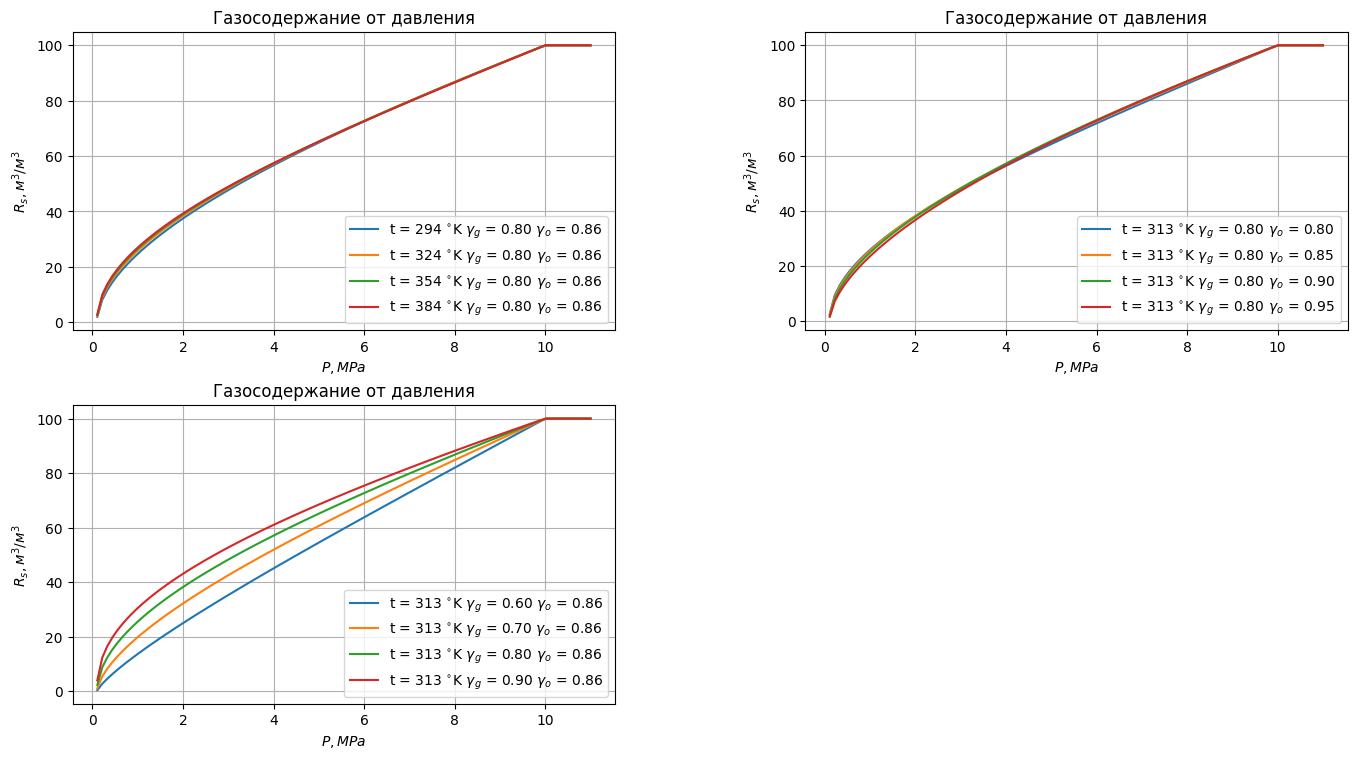

In [9]:
# код для построения графиков
plt.figure(figsize=(15,8))
f = pvt.unf_rs_Velarde_m3m3
# рисуем первый график
plt.subplot(221)
plt.grid()
plot_rs_p(plt, pvt.unf_rs_Velarde_m3m3,
          t_set,go_set_def,gg_set_def,
              'Газосодержание от давления',
               '$P, MPa$',
               '$R_s, м^3/м^3$')
# рисуем второй график
plt.subplot(222)
plt.grid()
plot_rs_p(plt, pvt.unf_rs_Velarde_m3m3,
          t_set_def,go_set,gg_set_def,
              'Газосодержание от давления',
               '$P, MPa$',
               '$R_s, м^3/м^3$')
# рисуем третий график
plt.subplot(223)
plot_rs_p(plt, pvt.unf_rs_Velarde_m3m3,
          t_set_def,go_set_def,gg_set,
              'Газосодержание от давления',
               '$P, MPa$',
               '$R_s, м^3/м^3$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
# рисуем все
plt.grid()
plt.show()

## Оценка объема растворенного газа в сепараторе, для уточнения газосодержания по замерам на сепараторе. Корреляция Маккейна.


Во многих корреляциях используется в качестве исходного параметра - газосодержание при давлении насыщения. Значение этого параметра может быть получено с помощью полевых данных как сумма отделяемого газового фактора в сепараторе и резервуаре для товарной нефти.


$$ R_{sb} = R_{sp} + R_{st}   $$

где:

$R_{sb}$ - газосодержание при давлении насыщения, $м^3/м^3$

$R_{sp}$ - газовый фактор, отделяемый в сепараторе, $м^3/м^3$

$R_{st}$ -  газовый фактор в резервуаре для товарной нефти, $м^3/м^3$

Данное уравнение справедливо только если пластовое давление выше давления насыщения.

```{figure} pics/McCain_Rsb with stock tank and separator.jpg
---
width: 600px
name: directive-fig
---
Схема
```

Расход газа и дебит нефти в сепараторе обычно измеряются, когда как в резервуаре газ обычно выпускается и не замеряется. Поэтому для более точной оценки газосодержания пластовой нефти при давлении насыщения необходимо оценить газовый фактор в резервуаре.
Таким образом, был разработана формула на основе GRACE-алгоритма на базе 898 исследований пластового флюида. В таблице приведены набор данных для исследования.

```{figure} pics/McCain_Rsb with stock tank and separator_data.jpg
---
width: 600px
name: directive-fig
---
Диапазоны значений
```


$$ ln R_{st} = 3.955 + 0.83z - 0.024z^2 + 0.075z^3  $$

где 

$$ z =\sum_{n=1}^3 z_n $$

$$ z_n = C0_n + C1_nV_n + C2_nV_n^2 $$

| <p align="left"> $n$  | $V$|$CO$|$C1$|$C2$|
| :--- | :---: |:---:|:---:|:---:|
| <p align="left"> $1$  | $ln P_{sp} $ |$-8.005$| $2.7$|$-0.161$|
| <p align="left"> $2$  | $ln T_{sp}$  |$1.224$|$-0.5$|$0$|
| <p align="left"> $3$ | $API$  |$-1.587$|$0.0441$|$-2.29 \cdot  10 ^{-5}$|
    
$T_{sp}$  - температура на сепараторе,  °F
    
$P_{sp}$  - давление на сепаратора, psia

Выражение для вычисления газового фактора в резервуаре требует знать температуру и давление в сепараторе, которые обычно не всегда бывают известны. Поэтому в этом случае можно использовать следующее уравнение.

$$ R_{sb} = 1.1618 R_{sp}    $$
    
> "Reservoir oil bubblepoint pressures revisited; solution gas–oil ratios and surface gas specific gravities",
    J. VELARDE, W.D. MCCAIN, 2002

In [16]:
# параметры определяющие диапазоны значений для построения графиков
p_set=np.arange(1,11,0.25)
t_set=np.arange(294,400,30)
t_set_def=np.array([313])
go_set=np.arange(0.8,1,0.05)
go_set_def=np.array([0.86])
r_sp = 50
# функция для автоматизации построения графиков по давлению насыщения
def plot_rsb_psep(plt,func,
                  tset, goset,
                  plot_title, plot_xlab, plot_ylab):
    for t in tset:
            for go in goset:
                plt.plot(p_set, func(r_sp,p_set,t,go), 
                         label=r't = %1.0f $ ^{\circ}\mathrm{K}$'%t +
                                                  r' $\gamma_o$ = %1.2f'%go)
    plt.title(plot_title)
    plt.ylabel(plot_ylab, color = 'black')
    plt.xlabel(plot_xlab, color = 'black')
    plt.legend()

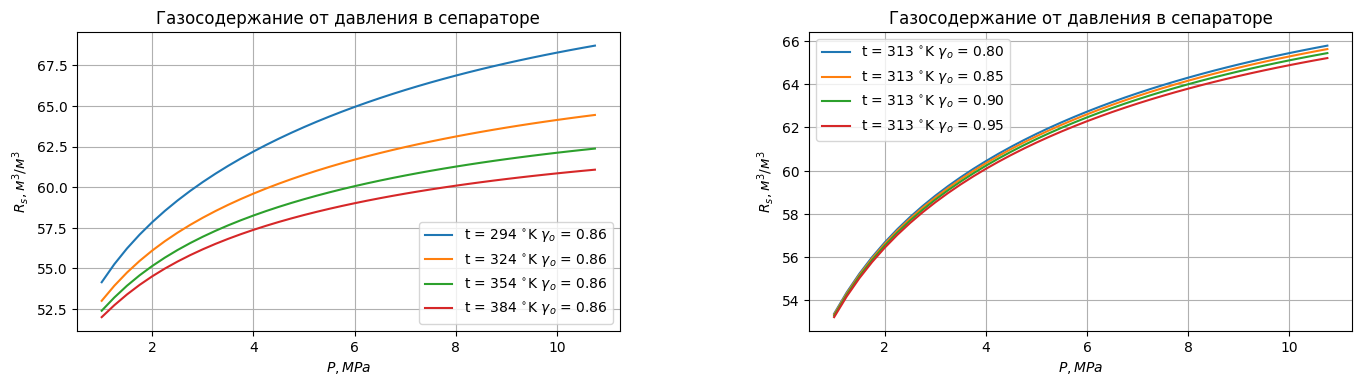

In [18]:
# код для построения графиков
plt.figure(figsize=(15,8))
f = pvt.unf_rsb_Mccain_m3m3
# рисуем первый график
plt.subplot(221)
plt.grid()
plot_rsb_psep(plt, f,
              t_set, go_set_def,
              'Газосодержание от давления в сепараторе',
              '$P, MPa$',
              '$R_s, м^3/м^3$')
# рисуем второй график
plt.subplot(222)
plt.grid()
plot_rsb_psep(plt, f,
              t_set_def,go_set,
              'Газосодержание от давления в сепараторе',
              '$P, MPa$',
              '$R_s, м^3/м^3$')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
# рисуем все
plt.show()

# Список литературы

1. "A Pressure-Volume-Temperature Correlation for Mixtures of California Oil and Gases", M.B. Standing, Drill. & Prod. Prac., API, 1947.
2. "Correlation of Black Oil Properties at Pressures Below Bubblepoint Pressure—A New Approach",
    J. VELARDE, T.A. BLASINGAME Texas A&M University, W.D. MCCAIN, JR. S.A. Holditch & Associates, Inc 1999
3. "Reservoir oil bubblepoint pressures revisited; solution gas–oil ratios and surface gas specific gravities",
    J. VELARDE, W.D. MCCAIN, 2002